# Financial Programming - IÉSEG, Lille - MBD 2023-2024
## Group Project


In [985]:
first_name = 'Ketan'
last_name = 'Bopanna'


In [986]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#For Plots
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



# Show all columns
pd.set_option('display.max_columns', None)

In [987]:
# Import banking data
# Note: This data was extracted on 1999

# Each record describes characteristics of a account
account = pd.read_csv('./data/raw/data_berka/account.asc', sep=';')

# Each record describes a credit card issued to an account
card = pd.read_csv('./data/raw/data_berka/card.asc', sep=';')

#Each record describes characteristics of a client
client = pd.read_csv('./data/raw/data_berka/client.asc', sep=';')

# Each record relates together a client with an account
# i.e. this relation describes the rights of clients to operate accounts
disp = pd.read_csv('./data/raw/data_berka/disp.asc', sep=';')

# Each record describes demographic characteristics of a district
district = pd.read_csv('./data/raw/data_berka/district.asc', sep=';')

# Each record describes a loan granted for a given account
loan = pd.read_csv('./data/raw/data_berka/loan.asc', sep=';')

# Each record describes characteristics of a payment order (debits only)
order = pd.read_csv('./data/raw/data_berka/order.asc', sep=';')

# Each record describes one transaction on an account
trans = pd.read_csv('./data/raw/data_berka/trans.asc', sep=';', low_memory=False)

# Each record describes static characteristics of an account
account = pd.read_csv('./data/raw/data_berka/account.asc', sep=';')


In [988]:
# we look at the statistical charateristics of the datsets

#for i, dfr in enumerate(dflist):
 #   print(dflist[i].describe())
dflist = [account, card, client, disp, district, loan, order, trans, account]
for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

(4500, 4)
(892, 4)
(5369, 3)
(5369, 4)
(77, 16)
(682, 7)
(6471, 6)
(1056320, 10)
(4500, 4)


In [989]:
# Create column year
account['year'] = account['date'].astype(str).str[:2].astype(int) + 1900
#Before 1996
df = account[account['year'] < 1996].copy(deep=True)
df.head()

,account_id,district_id,frequency,date,year
0,576,55,POPLATEK MESICNE,930101,1993
1,3818,74,POPLATEK MESICNE,930101,1993
2,704,55,POPLATEK MESICNE,930101,1993
3,2378,16,POPLATEK MESICNE,930101,1993
4,2632,24,POPLATEK MESICNE,930102,1993


In [990]:
# Add length of relationship in year (New IV)
df['lor'] = 1996 - df['year']
df.head()

,account_id,district_id,frequency,date,year,lor
0,576,55,POPLATEK MESICNE,930101,1993,3
1,3818,74,POPLATEK MESICNE,930101,1993,3
2,704,55,POPLATEK MESICNE,930101,1993,3
3,2378,16,POPLATEK MESICNE,930101,1993,3
4,2632,24,POPLATEK MESICNE,930102,1993,3


In [991]:
# Add information about account owner
df = pd.merge(df, disp[disp['type'] == 'OWNER'], how='left', on='account_id')
df = pd.merge(df, client, how='left', on='client_id')
df = df.rename(columns={'district_id_x':'bank_district_id',
                        'district_id_y':'client_district_id'})
df.head()

,account_id,bank_district_id,frequency,date,year,lor,disp_id,client_id,type,birth_number,client_district_id
0,576,55,POPLATEK MESICNE,930101,1993,3,692,692,OWNER,365111,74
1,3818,74,POPLATEK MESICNE,930101,1993,3,4601,4601,OWNER,350402,1
2,704,55,POPLATEK MESICNE,930101,1993,3,844,844,OWNER,450114,22
3,2378,16,POPLATEK MESICNE,930101,1993,3,2873,2873,OWNER,755324,16
4,2632,24,POPLATEK MESICNE,930102,1993,3,3177,3177,OWNER,380812,24


In [992]:
# Transform the birth day into year
df['birth_year'] = '19' + df['birth_number'].astype(str).str[:2]
df['birth_year'] = df['birth_year'].astype(int)

# Transform the birth day to day
df['birth_day'] = df['birth_number'].astype(str).str[-2:].astype(int)

# Extract the birth month
df['birth_month'] = df['birth_number'].astype(str).str[2:4].astype(int)

# Extract and correct the gender
df['gender'] = 'M'
df.loc[df['birth_month'] > 50, 'gender'] = 'F'

# Correct the birth month
df.loc[df['birth_month'] > 50, 'birth_month'] = df.loc[df['birth_month'] > 50, 'birth_month'] - 50
df.head()

#Professor Level

,account_id,bank_district_id,frequency,date,year,lor,disp_id,client_id,type,birth_number,client_district_id,birth_year,birth_day,birth_month,gender
0,576,55,POPLATEK MESICNE,930101,1993,3,692,692,OWNER,365111,74,1936,11,1,F
1,3818,74,POPLATEK MESICNE,930101,1993,3,4601,4601,OWNER,350402,1,1935,2,4,M
2,704,55,POPLATEK MESICNE,930101,1993,3,844,844,OWNER,450114,22,1945,14,1,M
3,2378,16,POPLATEK MESICNE,930101,1993,3,2873,2873,OWNER,755324,16,1975,24,3,F
4,2632,24,POPLATEK MESICNE,930102,1993,3,3177,3177,OWNER,380812,24,1938,12,8,M


In [993]:
#IV1: Age of the client

In [994]:
# Age
df['age'] = 1996 - df['birth_year']

# Age group
df['age_group'] = df['age'] // 10 * 10
df.head()

,account_id,bank_district_id,frequency,date,year,lor,disp_id,client_id,type,birth_number,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group
0,576,55,POPLATEK MESICNE,930101,1993,3,692,692,OWNER,365111,74,1936,11,1,F,60,60
1,3818,74,POPLATEK MESICNE,930101,1993,3,4601,4601,OWNER,350402,1,1935,2,4,M,61,60
2,704,55,POPLATEK MESICNE,930101,1993,3,844,844,OWNER,450114,22,1945,14,1,M,51,50
3,2378,16,POPLATEK MESICNE,930101,1993,3,2873,2873,OWNER,755324,16,1975,24,3,F,21,20
4,2632,24,POPLATEK MESICNE,930102,1993,3,3177,3177,OWNER,380812,24,1938,12,8,M,58,50


In [995]:
# IVS 2,3,4: Variables Average credit, Average Withdrawal, Average Net Financial Activity

In [996]:
# Data validation and cleaning 

In [997]:
# Count the number of missing values in the column
print(trans['amount'].isna().sum())

# Count the number of zero values in the column
zero_values_mask = trans['amount'] ==0
print(zero_values_mask.sum())

# Check uniaue values
print(trans['type'].unique())

# Count how many rows with outliers 'VYBER' exist
print((trans['type'] == 'VYBER').sum())

# Replace outliers 'VYBER' by 'VYDAJ' in a copy of dataframe trans: trans1
trans1=trans.copy()
trans1['type'] = trans1['type'].replace('VYBER', 'VYDAJ')
print( (trans1['type'] == 'VYBER').sum())

# Convert YYMMDD to datetime
trans1['date'] = pd.to_datetime(trans1['date'], format='%y%m%d')

#Rows selection:
# Select rows where the amount is more than 0
trans_1996 = trans1[trans1['amount'] > 0]

# Select rows where the year is equal to 1996
trans_1996 = trans_1996[trans_1996['date'].dt.year == 1996]

print(trans_1996)


0
14
['PRIJEM' 'VYDAJ' 'VYBER']
16666
0
        trans_id  account_id       date   type     operation  amount  balance  \
252855    732811        2504 1996-01-01  VYDAJ  VYBER KARTOU   900.0  38124.4   
252856    800209        2729 1996-01-01  VYDAJ         VYBER  1920.0  34202.7   
252857    803553        2738 1996-01-01  VYDAJ         VYBER  6500.0  25685.2   
252858   1042686        3566 1996-01-01  VYDAJ         VYBER  1000.0  25919.7   
252859   1042689        3566 1996-01-01  VYDAJ         VYBER   500.0  25419.7   
...          ...         ...        ...    ...           ...     ...      ...   
449629    515914        1763 1996-12-31  VYDAJ         VYBER    14.6  67769.5   
449630    516262        1765 1996-12-31  VYDAJ         VYBER    14.6  19708.1   
449631    520019        1775 1996-12-31  VYDAJ         VYBER    14.6  15944.5   
449632    517894        1769 1996-12-31  VYDAJ         VYBER    14.6  34679.4   
449633    518239        1770 1996-12-31  VYDAJ         VYBER    14.6 

In [998]:
# Variables Calculation 2,3,4: Variables Average credit, Average Withdrawal, Average Net Financial Activity

In [999]:
# Group by 'account_id' and 'type' and calculate the average
averages = trans_1996.groupby(['account_id', 'type'])['amount'].mean().reset_index()

# Pivot the result to have 'account_id' as the index and 'PRIJEM' and 'VYDAJ' as columns
pivoted_averages = averages.pivot(index='account_id', columns='type', values='amount').reset_index()

# Merge the DataFrames for 'PRIJEM' and 'VYDAJ' based on 'account_id'
averages_by_account = pd.merge(trans_1996[['account_id']].drop_duplicates(), pivoted_averages, on='account_id', how='left')

# Replacing missing values
averages_by_account['PRIJEM'] = averages_by_account['PRIJEM'].fillna(0)
averages_by_account['VYDAJ'] = averages_by_account['VYDAJ'].fillna(0)

# Creating average Average_Net_Financial_Activity
averages_by_account['avg_net_financial_activity'] = averages_by_account['PRIJEM']-averages_by_account['VYDAJ']
averages_by_account = averages_by_account.rename(columns={'PRIJEM': 'avg_credit', 'VYDAJ': 'avg_withdrawal'})
print(averages_by_account)

      account_id    avg_credit  avg_withdrawal  avg_net_financial_activity
0           2504  12736.845833     6437.371429                 6299.474405
1           2729   6568.310000     3943.721739                 2624.588261
2           2738   7820.066667     3113.600000                 4706.466667
3           3566   2758.657692     1594.523077                 1164.134615
4           2365   2602.883333     1478.347368                 1124.535965
...          ...           ...             ...                         ...
3597         528    300.000000        0.000000                  300.000000
3598        3190   1000.000000        0.000000                 1000.000000
3599        1988    300.000000        0.000000                  300.000000
3600        1390    400.000000        0.000000                  400.000000
3601        2064    500.000000        0.000000                  500.000000

[3602 rows x 4 columns]


In [1000]:
# Merging the variales related to transactions in the dataframe basetable (df) 

In [1001]:
df = pd.merge(df, averages_by_account, how='left', on='account_id')
df.head()

,account_id,bank_district_id,frequency,date,year,lor,disp_id,client_id,type,birth_number,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group,avg_credit,avg_withdrawal,avg_net_financial_activity
0,576,55,POPLATEK MESICNE,930101,1993,3,692,692,OWNER,365111,74,1936,11,1,F,60,60,3170.720833,1853.136842,1317.583991
1,3818,74,POPLATEK MESICNE,930101,1993,3,4601,4601,OWNER,350402,1,1935,2,4,M,61,60,9392.256000,3062.126027,6330.129973
2,704,55,POPLATEK MESICNE,930101,1993,3,844,844,OWNER,450114,22,1945,14,1,M,51,50,9521.454167,3642.186667,5879.267500
3,2378,16,POPLATEK MESICNE,930101,1993,3,2873,2873,OWNER,755324,16,1975,24,3,F,21,20,19545.452941,12924.697959,6620.754982
4,2632,24,POPLATEK MESICNE,930102,1993,3,3177,3177,OWNER,380812,24,1938,12,8,M,58,50,7777.454167,2582.043243,5195.410923


In [1002]:
# IV5: Encoding frequency into numerical values

In [1003]:
# Data validation and cleaning 

In [1004]:
# Count the number of missing values in the column
print(df['frequency'].isna().sum())

# Check unique values
print(df['frequency'].unique())

0
['POPLATEK MESICNE' 'POPLATEK PO OBRATU' 'POPLATEK TYDNE']


In [1005]:
# Variable Calculation

In [1006]:
df['frequency'] = df['frequency'].map({
    "POPLATEK MESICNE": 1,
    "POPLATEK TYDNE": 2,
    "POPLATEK PO OBRATU": 3
})
df.head()

,account_id,bank_district_id,frequency,date,year,lor,disp_id,client_id,type,birth_number,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group,avg_credit,avg_withdrawal,avg_net_financial_activity
0,576,55,1,930101,1993,3,692,692,OWNER,365111,74,1936,11,1,F,60,60,3170.720833,1853.136842,1317.583991
1,3818,74,1,930101,1993,3,4601,4601,OWNER,350402,1,1935,2,4,M,61,60,9392.256000,3062.126027,6330.129973
2,704,55,1,930101,1993,3,844,844,OWNER,450114,22,1945,14,1,M,51,50,9521.454167,3642.186667,5879.267500
3,2378,16,1,930101,1993,3,2873,2873,OWNER,755324,16,1975,24,3,F,21,20,19545.452941,12924.697959,6620.754982
4,2632,24,1,930102,1993,3,3177,3177,OWNER,380812,24,1938,12,8,M,58,50,7777.454167,2582.043243,5195.410923


In [1007]:
# IV 6 and 7: Number of permanent orders and Total permanent order amount

In [1008]:
# Data validation and cleaning 

In [1009]:
# Count the number of missing values in the column 'account_id'
print(order['account_id'].isna().sum())

#Check duplicates in 'account_id'
print(df['account_id'].duplicated().sum())

# Count the number of missing values in the column 'amount'
print(order['amount'].isna().sum())

# Count the number of zero values in the column
zero_values_mask = order['amount'] ==0
print(zero_values_mask.sum())

0
0
0
0


In [1010]:
# Variables Calculation

In [1011]:
# Count the number of unique order_id values for each account_id
order_counts = order.groupby('account_id')['order_id'].nunique().reset_index()

# Sum the amount column by account_id
amount_sum = order.groupby('account_id')['amount'].sum().reset_index()

# Merge the two results on 'account_id'
order_counts_sum = pd.merge(order_counts, amount_sum, on='account_id')

# Rename the columns for clarity
order_counts_sum.columns = ['account_id', 'number_of_permanent_orders', 'total_permanent_order_amount']

# Display the result
print(order_counts_sum)

      account_id  number_of_permanent_orders  total_permanent_order_amount
0              1                           1                        2452.0
1              2                           2                       10638.7
2              3                           3                        5001.0
3              4                           2                        3363.0
4              5                           1                        2668.0
...          ...                         ...                           ...
3753       11328                           1                        4674.0
3754       11333                           1                        3286.7
3755       11349                           2                       17884.0
3756       11359                           3                        9274.3
3757       11362                           5                       10687.0

[3758 rows x 3 columns]


In [1012]:
#Merge of variables 6 and 7 into the dataframe basetable

In [1013]:
df = pd.merge(df, order_counts_sum, how='left', on='account_id')
# Replacing missing values
df['number_of_permanent_orders'] = df['number_of_permanent_orders'].fillna(0)
df['total_permanent_order_amount'] = df['total_permanent_order_amount'].fillna(0)
df.head()


,account_id,bank_district_id,frequency,date,year,lor,disp_id,client_id,type,birth_number,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group,avg_credit,avg_withdrawal,avg_net_financial_activity,number_of_permanent_orders,total_permanent_order_amount
0,576,55,1,930101,1993,3,692,692,OWNER,365111,74,1936,11,1,F,60,60,3170.720833,1853.136842,1317.583991,1.0,3662.0
1,3818,74,1,930101,1993,3,4601,4601,OWNER,350402,1,1935,2,4,M,61,60,9392.256000,3062.126027,6330.129973,3.0,9135.0
2,704,55,1,930101,1993,3,844,844,OWNER,450114,22,1945,14,1,M,51,50,9521.454167,3642.186667,5879.267500,2.0,3338.0
3,2378,16,1,930101,1993,3,2873,2873,OWNER,755324,16,1975,24,3,F,21,20,19545.452941,12924.697959,6620.754982,1.0,9612.0
4,2632,24,1,930102,1993,3,3177,3177,OWNER,380812,24,1938,12,8,M,58,50,7777.454167,2582.043243,5195.410923,3.0,4383.0


In [1014]:
# IV 8 and 9: Variables number of transactions and number of Withdrawals

In [1015]:
# Variables Calculation

In [1016]:
#Takes the already cleaned and validated dataframe trans_1996
#Count total number of transaction per account_id
df_trans = trans_1996[['account_id', 'trans_id']].copy()
df_trans.head()
df_trans['trans_count'] = df_trans.groupby('account_id')['trans_id'].transform('size')
df_trans.head()
del df_trans['trans_id']
df_trans.head()

#Count the number of withdrwals per client
withdraw = trans_1996[['account_id','type']].copy()
withdraw['withdrawal_count'] = withdraw.groupby('account_id')['type'].transform(lambda x: x.eq('VYDAJ').sum())
del withdraw['type']
withdraw.head()

#Merge the tables together
final_trans = pd.merge(df_trans, withdraw, on = 'account_id', how = 'left')
final_trans = final_trans.drop_duplicates('account_id')


In [1017]:
final_trans.head()

,account_id,trans_count,withdrawal_count
0,2504,73,49
73,2729,76,46
149,2738,86,62
235,3566,78,52
391,2365,62,38


In [1018]:
df = pd.merge(df, final_trans, how='left', on='account_id')
df.head()

,account_id,bank_district_id,frequency,date,year,lor,disp_id,client_id,type,birth_number,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group,avg_credit,avg_withdrawal,avg_net_financial_activity,number_of_permanent_orders,total_permanent_order_amount,trans_count,withdrawal_count
0,576,55,1,930101,1993,3,692,692,OWNER,365111,74,1936,11,1,F,60,60,3170.720833,1853.136842,1317.583991,1.0,3662.0,62,38
1,3818,74,1,930101,1993,3,4601,4601,OWNER,350402,1,1935,2,4,M,61,60,9392.256000,3062.126027,6330.129973,3.0,9135.0,98,73
2,704,55,1,930101,1993,3,844,844,OWNER,450114,22,1945,14,1,M,51,50,9521.454167,3642.186667,5879.267500,2.0,3338.0,84,60
3,2378,16,1,930101,1993,3,2873,2873,OWNER,755324,16,1975,24,3,F,21,20,19545.452941,12924.697959,6620.754982,1.0,9612.0,83,49
4,2632,24,1,930102,1993,3,3177,3177,OWNER,380812,24,1938,12,8,M,58,50,7777.454167,2582.043243,5195.410923,3.0,4383.0,98,74


In [1019]:
#IV 10: Variables related to Disposition information: Count of total number of dispositions for each client

In [1020]:
# Data validation and cleaning 

In [1021]:
#Check of number of Owners and Number of DISPONENTS in dataframe 'disp'
owner_counts = disp['type'].value_counts()
print(owner_counts)

#Check Missing Values, NA, 0, Outliers
#Check for missing values, NA values, and 0 values in the 'DispCount' column

missing_values = disp['disp_id'].isnull().sum()
na_values = disp['client_id'].isna().sum()
zero_values = (disp['account_id'] == 0).sum()
zero_values = (disp['type'] == 0).sum()

print(f"Missing values in 'DispCount': {missing_values}")
print(f"NA values in 'DispCount': {na_values}")
print(f"Number of 0 values in 'DispCount': {zero_values}")


type
OWNER        4500
DISPONENT     869
Name: count, dtype: int64
Missing values in 'DispCount': 0
NA values in 'DispCount': 0
Number of 0 values in 'DispCount': 0


There are no Errors to correct

In [1022]:
# Variables Calculation

In [1023]:

    #First Vairable names DispCount created
    #Created a new vaeiable Disposition Count and added into a new table
    
#groupby acct ID
disp_counts = disp[disp['type'] == 'DISPONENT'].groupby('account_id').size().reset_index(name='DispCount')

# Get unique account IDs
unique_account_ids = disp['account_id'].unique()

# Create a DataFrame with unique account IDs
df_unique_account_ids = pd.DataFrame({'account_id': unique_account_ids})

# Merge the DataFrames on 'account_id'
DispCountresult_df = pd.merge(df_unique_account_ids, disp_counts, on='account_id', how='left').fillna(0).astype(int)
DispCountresult_df

,account_id,DispCount
0,1,0
1,2,1
2,3,1
3,4,0
4,5,0
...,...,...
4495,11333,0
4496,11349,1
4497,11359,0
4498,11362,0


In [1024]:
# VALIDATION the sum of the disponents from before and after 
DispCountresult_df.DispCount.sum()

869

In [1025]:
#IV11 and 12: Average Salary per district_id and unemployment rate district_id

In [1026]:
# Data validation and cleaning 

In [1027]:
# Example 8:Checking the A11, to check the before and after of average_salary
#district.A11.isnull()
print(district['A11'].sum())

695439


In [1028]:
# Variables Calculation

In [1029]:
# Rename 'bank_district_id' to 'district_id'
dist_duplicate = district.copy()

# Rename 'bank_district_id' to 'district_id'
dist_duplicate.rename(columns={'A1': 'district_id'}, inplace=True)
dist_duplicate.A3

0              Prague
1     central Bohemia
2     central Bohemia
3     central Bohemia
4     central Bohemia
           ...       
72      north Moravia
73      north Moravia
74      north Moravia
75      north Moravia
76      north Moravia
Name: A3, Length: 77, dtype: object

In [1030]:
df_duplicate = df.copy()
df_duplicate.rename(columns={'bank_district_id': 'district_id'}, inplace=True)

Here the Demograph_df and df_duplicate have the same number of nunique(), thus the below join pd.merge already 

In [1031]:
#Created a new vaeiable average_salary, unemployment_rate, per account ID
# Rename the 'A11' column to 'average_salary'
dist_duplicate.rename(columns={'A11': 'average_salary'}, inplace=True)

# Rename the 'A2' column to 'district_name'
dist_duplicate.rename(columns={'A2': 'district_name'}, inplace=True)

# Rename the 'A2' column to 'region'
dist_duplicate.rename(columns={'A3': 'region_name'}, inplace=True)

# Rename the 'A13' column to 'unemployment_rate'
dist_duplicate.rename(columns={'A13': 'unemployment_rate'}, inplace=True)

# Specify the columns you want from each DataFrame
columns_from_dist_duplicate = ['district_id', 'district_name', 'region_name', 'average_salary', 'unemployment_rate']
columns_from_df_duplicate = ['district_id', 'account_id']

# Merge the DataFrames on 'district_id'
Demograph_df = pd.merge(dist_duplicate[columns_from_dist_duplicate], df_duplicate[columns_from_df_duplicate], on='district_id', how='left')
Demograph_df

,district_id,district_name,region_name,average_salary,unemployment_rate,account_id
0,1,Hl.m. Praha,Prague,12541,0.43,1539
1,1,Hl.m. Praha,Prague,12541,0.43,1637
2,1,Hl.m. Praha,Prague,12541,0.43,764
3,1,Hl.m. Praha,Prague,12541,0.43,1730
4,1,Hl.m. Praha,Prague,12541,0.43,2925
...,...,...,...,...,...,...
2234,77,Vsetin,north Moravia,8909,5.56,3750
2235,77,Vsetin,north Moravia,8909,5.56,1590
2236,77,Vsetin,north Moravia,8909,5.56,2919
2237,77,Vsetin,north Moravia,8909,5.56,53


In [1032]:
# Variable validation

In [1033]:
#Checking the original number of unique Act_id match with the unique Act_id in Demograph_df

print(f"Number of unique 'account_id' values in df_duplicate: {df_duplicate['account_id'].nunique()}")
print(f"Count of 'account_id' values in df_duplicate: {df_duplicate['account_id'].count()}")

print(f"Number of unique 'account_id' values in Demograph_df: {Demograph_df['account_id'].nunique()}")
print(f"Count of 'account_id' values in Demograph_df: {Demograph_df['account_id'].count()}")

Number of unique 'account_id' values in df_duplicate: 2239
Count of 'account_id' values in df_duplicate: 2239
Number of unique 'account_id' values in Demograph_df: 2239
Count of 'account_id' values in Demograph_df: 2239


In [1034]:
# Identify rows with NaN values in 'average_salary', checking the sum of average salary
print(f"SUM of dist_duplicate: {dist_duplicate['average_salary'].sum()}")

print(f"SUM of Demograph_df: {Demograph_df['average_salary'].sum()}")


SUM of dist_duplicate: 695439
SUM of Demograph_df: 21335138


It is reasonable the sum of average_salary in thes both tables are differnt, because dist_duplicate shows onlt 77 row of unique 'district_id'

Where as Demograph_df has account_ID with multiple 'district_id' as shown below

In [1035]:
# Checking number of total data in A1 (District_ID) Remember A1 has been reamed into District_ID
row_, unique_check = Demograph_df['district_id'], Demograph_df[['account_id', 'district_id']].nunique()
print(row_, "\n", unique_check)
#There are 77 disctinct Dristic ID and 4500 disctinct account_ID

0        1
1        1
2        1
3        1
4        1
        ..
2234    77
2235    77
2236    77
2237    77
2238    77
Name: district_id, Length: 2239, dtype: int64 
 account_id     2239
district_id      77
dtype: int64


In [1036]:
# Filter the rows where account_id is '4462'
red_data = df_duplicate[df_duplicate['account_id'] == 4462]

# Print the filtered data with all columns
print(red_data.to_string(index=False))

 account_id  district_id  frequency   date  year  lor  disp_id  client_id  type  birth_number  client_district_id  birth_year  birth_day  birth_month gender  age  age_group   avg_credit  avg_withdrawal  avg_net_financial_activity  number_of_permanent_orders  total_permanent_order_amount  trans_count  withdrawal_count
       4462           73          2 951227  1995    1     5384       5384 OWNER        350721                  73        1935         21            7      M   61         60 10023.028571     6942.092593                 3080.935979                         1.0                        2770.3           48                27


In [1037]:
#Merge of IVS 10,11,12

In [1038]:
# Merge the dataframes based on the 'account_id' column
Ketan_df = pd.merge(Demograph_df, DispCountresult_df, on='account_id')

# Rearrange the columns to have 'account_id' on the most left
Ketan_df = Ketan_df[['account_id'] + [col for col in Ketan_df.columns if col != 'account_id']]
Ketan_df

,account_id,district_id,district_name,region_name,average_salary,unemployment_rate,DispCount
0,1539,1,Hl.m. Praha,Prague,12541,0.43,0
1,1637,1,Hl.m. Praha,Prague,12541,0.43,0
2,764,1,Hl.m. Praha,Prague,12541,0.43,0
3,1730,1,Hl.m. Praha,Prague,12541,0.43,0
4,2925,1,Hl.m. Praha,Prague,12541,0.43,0
...,...,...,...,...,...,...,...
2234,3750,77,Vsetin,north Moravia,8909,5.56,1
2235,1590,77,Vsetin,north Moravia,8909,5.56,1
2236,2919,77,Vsetin,north Moravia,8909,5.56,0
2237,53,77,Vsetin,north Moravia,8909,5.56,0


In [1039]:
df = pd.merge(df, Ketan_df, how='left', on='account_id')
df.head()

,account_id,bank_district_id,frequency,date,year,lor,disp_id,client_id,type,birth_number,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group,avg_credit,avg_withdrawal,avg_net_financial_activity,number_of_permanent_orders,total_permanent_order_amount,trans_count,withdrawal_count,district_id,district_name,region_name,average_salary,unemployment_rate,DispCount
0,576,55,1,930101,1993,3,692,692,OWNER,365111,74,1936,11,1,F,60,60,3170.720833,1853.136842,1317.583991,1.0,3662.0,62,38,55,Brno - venkov,south Moravia,8743,2.43,1
1,3818,74,1,930101,1993,3,4601,4601,OWNER,350402,1,1935,2,4,M,61,60,9392.256000,3062.126027,6330.129973,3.0,9135.0,98,73,74,Ostrava - mesto,north Moravia,10673,5.44,1
2,704,55,1,930101,1993,3,844,844,OWNER,450114,22,1945,14,1,M,51,50,9521.454167,3642.186667,5879.267500,2.0,3338.0,84,60,55,Brno - venkov,south Moravia,8743,2.43,1
3,2378,16,1,930101,1993,3,2873,2873,OWNER,755324,16,1975,24,3,F,21,20,19545.452941,12924.697959,6620.754982,1.0,9612.0,83,49,16,Jindrichuv Hradec,south Bohemia,8427,1.54,0
4,2632,24,1,930102,1993,3,3177,3177,OWNER,380812,24,1938,12,8,M,58,50,7777.454167,2582.043243,5195.410923,3.0,4383.0,98,74,24,Karlovy Vary,west Bohemia,8991,2.01,0


In [1040]:
#IV13: Major region

In [1041]:
# Define a mapping of region_name to major class
region_mapping = {
    'south Moravia': 'Moravia',
    'north Moravia': 'Moravia',
    'south Bohemia': 'Bohemia',
    'west Bohemia': 'Bohemia',
    'Prague': 'Capital',
    'east Bohemia': 'Bohemia',
    'central Bohemia': 'Bohemia',
    'north Bohemia': 'Bohemia'
}

# Create a new column 'major_class' based on the mapping
df['major_region'] = df['region_name'].map(region_mapping)
df.head()

,account_id,bank_district_id,frequency,date,year,lor,disp_id,client_id,type,birth_number,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group,avg_credit,avg_withdrawal,avg_net_financial_activity,number_of_permanent_orders,total_permanent_order_amount,trans_count,withdrawal_count,district_id,district_name,region_name,average_salary,unemployment_rate,DispCount,major_region
0,576,55,1,930101,1993,3,692,692,OWNER,365111,74,1936,11,1,F,60,60,3170.720833,1853.136842,1317.583991,1.0,3662.0,62,38,55,Brno - venkov,south Moravia,8743,2.43,1,Moravia
1,3818,74,1,930101,1993,3,4601,4601,OWNER,350402,1,1935,2,4,M,61,60,9392.256000,3062.126027,6330.129973,3.0,9135.0,98,73,74,Ostrava - mesto,north Moravia,10673,5.44,1,Moravia
2,704,55,1,930101,1993,3,844,844,OWNER,450114,22,1945,14,1,M,51,50,9521.454167,3642.186667,5879.267500,2.0,3338.0,84,60,55,Brno - venkov,south Moravia,8743,2.43,1,Moravia
3,2378,16,1,930101,1993,3,2873,2873,OWNER,755324,16,1975,24,3,F,21,20,19545.452941,12924.697959,6620.754982,1.0,9612.0,83,49,16,Jindrichuv Hradec,south Bohemia,8427,1.54,0,Bohemia
4,2632,24,1,930102,1993,3,3177,3177,OWNER,380812,24,1938,12,8,M,58,50,7777.454167,2582.043243,5195.410923,3.0,4383.0,98,74,24,Karlovy Vary,west Bohemia,8991,2.01,0,Bohemia


In [1042]:
#IV14,15,16: number Issued_Year Issued_Month Issued_Day

In [1043]:
# Variable calculation

In [1044]:
# Extract only the date component from the 'issued' column
card['date'] = pd.to_datetime(card['issued'], format='%y%m%d %H:%M:%S').dt.date

# Convert the 'date' column to datetime format
card['date'] = pd.to_datetime(card['date'])

# Extract the year, month, and date into separate columns
card['Issued_Year'] = card['date'].dt.year
card['Issued_Month'] = card['date'].dt.month
card['Issued_Day'] = card['date'].dt.day

In [1045]:
#IV17,18,19: number junior card, number classic card, number gold card

In [1046]:
# Create a duplicate of the card DataFrame
card_duplicate = card.copy()

# Initialize the count columns in the duplicate DataFrame

card_duplicate['junior_count'] = 0
card_duplicate['classic_count'] = 0
card_duplicate['gold_count'] = 0

# Group the data by 'disp_id' and 'type' and count the occurrences
grouped_counts = card_duplicate.groupby(['disp_id', 'type']).size().reset_index(name='count')

# Update the count columns based on the grouped counts
for index, row in grouped_counts.iterrows():
    disp_id = row['disp_id']
    card_type = row['type']
    count = row['count']
    
    card_duplicate.loc[(card_duplicate['disp_id'] == disp_id), f'{card_type}_count'] = count


# Print the updated card_duplicate DataFrame
print(card_duplicate)

     card_id  disp_id     type           issued       date  Issued_Year  \
0       1005     9285  classic  931107 00:00:00 1993-11-07         1993   
1        104      588  classic  940119 00:00:00 1994-01-19         1994   
2        747     4915  classic  940205 00:00:00 1994-02-05         1994   
3         70      439  classic  940208 00:00:00 1994-02-08         1994   
4        577     3687  classic  940215 00:00:00 1994-02-15         1994   
..       ...      ...      ...              ...        ...          ...   
887      125      694     gold  981226 00:00:00 1998-12-26         1998   
888      674     4360  classic  981228 00:00:00 1998-12-28         1998   
889      322     2063  classic  981228 00:00:00 1998-12-28         1998   
890      685     4467  classic  981229 00:00:00 1998-12-29         1998   
891      635     4083  classic  981229 00:00:00 1998-12-29         1998   

     Issued_Month  Issued_Day  junior_count  classic_count  gold_count  
0              11         

In [1047]:
#Validation and check the card
column_name = 'card_id'

#Checking for CARD table column duplciates
print(f"Number of duplicates in the '{column_name}' column: {card[column_name].duplicated().sum()}")

print(f"When junior 0: { (card_duplicate['junior_count'] == 0).sum() }")
print(f"When classic 0: {(card_duplicate['classic_count'] == 0).sum()}")
print(f"When gold 0: {(card_duplicate['gold_count'] == 0).sum()}")
print(                                                  )
print(f"When junior 1: { (card_duplicate['junior_count'] == 1).sum() }")
print(f"When classic 1: {(card_duplicate['classic_count'] == 1).sum()}")
print(f"When gold 1: {(card_duplicate['gold_count'] == 1).sum()}")
print(((card_duplicate['junior_count'] == 1) & ((card_duplicate['classic_count'] == 1) | (card_duplicate['gold_count'] == 1))).any())


Number of duplicates in the 'card_id' column: 0
When junior 0: 747
When classic 0: 233
When gold 0: 804

When junior 1: 145
When classic 1: 659
When gold 1: 88
False


In [1048]:
# Extracting columns from card_duplicate
selected_columns = ['disp_id', 'Issued_Year', 'Issued_Month', 'Issued_Day', 'junior_count', 'classic_count', 'gold_count']
selected_data = card_duplicate[selected_columns].copy()


df = pd.merge(df, selected_data, on='disp_id', how='left')
df.tail()

,account_id,bank_district_id,frequency,date,year,lor,disp_id,client_id,type,birth_number,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group,avg_credit,avg_withdrawal,avg_net_financial_activity,number_of_permanent_orders,total_permanent_order_amount,trans_count,withdrawal_count,district_id,district_name,region_name,average_salary,unemployment_rate,DispCount,major_region,Issued_Year,Issued_Month,Issued_Day,junior_count,classic_count,gold_count
2234,4462,73,2,951227,1995,1,5384,5384,OWNER,350721,73,1935,21,7,M,61,60,10023.028571,6942.092593,3080.935979,1.0,2770.3,48,27,73,Opava,north Moravia,8746,3.74,0,Moravia,NaN,NaN,NaN,NaN,NaN,NaN
2235,3814,74,1,951227,1995,1,4596,4596,OWNER,735831,74,1973,31,8,F,23,20,3266.666667,1000.000000,2266.666667,0.0,0.0,12,3,74,Ostrava - mesto,north Moravia,10673,5.44,0,Moravia,NaN,NaN,NaN,NaN,NaN,NaN
2236,2780,63,1,951229,1995,1,3357,3357,OWNER,545721,63,1954,21,7,F,42,40,7496.780000,6196.672000,1300.108000,0.0,0.0,50,25,63,Vyskov,south Moravia,8288,4.52,0,Moravia,1998.0,2.0,27.0,0.0,1.0,0.0
2237,3273,74,1,951229,1995,1,3962,3962,OWNER,521128,74,1952,28,11,M,44,40,17724.535135,17463.137143,261.397992,1.0,7876.0,72,35,74,Ostrava - mesto,north Moravia,10673,5.44,0,Moravia,NaN,NaN,NaN,NaN,NaN,NaN
2238,3559,18,1,951230,1995,1,4295,4295,OWNER,600316,18,1960,16,3,M,36,30,7545.792000,5014.760000,2531.032000,1.0,4418.0,55,30,18,Pisek,south Bohemia,8968,3.35,0,Bohemia,1997.0,8.0,6.0,0.0,1.0,0.0


In [1049]:
#Validation

In [1050]:

selected_disp_ids = selected_data['disp_id'].unique()
df_disp_ids = df['disp_id'].unique()

# Finding common disp_ids using np.intersect1d
common_disp_ids = np.intersect1d(selected_disp_ids, df_disp_ids)

# Getting the count of common disp_ids
count_common_disp_ids = len(common_disp_ids)

# Displaying the result
print("Number of common disp_ids:", count_common_disp_ids)






Number of common disp_ids: 454


In [1051]:
#Error Correction

In [1052]:

columns_to_replace_nan = ['Issued_Year', 'Issued_Month', 'Issued_Day', 'junior_count', 'classic_count', 'gold_count']

# Replace NaN values with 0 in the specified columns
df[columns_to_replace_nan] = df[columns_to_replace_nan].fillna(0)

# Display the modified DataFrame
#df.head

In [1053]:
#IV20: Aggregate the total credit per account

In [1054]:
# Select on transactions in 1996, can be part of #5.
trans96 = trans[trans['date'].astype(str).str[:2].isin(['96'])]

agg_cTredit = trans96[trans96['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('sum')
agg_cTredit = agg_cTredit.reset_index()
agg_cTredit = agg_cTredit.rename(columns={'amount':'total_credit'})
agg_cTredit

,account_id,total_credit
0,1,50066.0
1,2,288542.9
2,4,56920.5
3,6,81507.7
4,7,34905.4
...,...,...
3596,11333,426027.5
3597,11349,551271.3
3598,11359,352777.0
3599,11362,211221.6


In [1055]:
# Extracting columns from card_duplicate
selected_aggC = ['total_credit']

df = pd.merge(df, agg_cTredit, on='account_id', how='left')
df.tail()

,account_id,bank_district_id,frequency,date,year,lor,disp_id,client_id,type,birth_number,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group,avg_credit,avg_withdrawal,avg_net_financial_activity,number_of_permanent_orders,total_permanent_order_amount,trans_count,withdrawal_count,district_id,district_name,region_name,average_salary,unemployment_rate,DispCount,major_region,Issued_Year,Issued_Month,Issued_Day,junior_count,classic_count,gold_count,total_credit
2234,4462,73,2,951227,1995,1,5384,5384,OWNER,350721,73,1935,21,7,M,61,60,10023.028571,6942.092593,3080.935979,1.0,2770.3,48,27,73,Opava,north Moravia,8746,3.74,0,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,210483.6
2235,3814,74,1,951227,1995,1,4596,4596,OWNER,735831,74,1973,31,8,F,23,20,3266.666667,1000.000000,2266.666667,0.0,0.0,12,3,74,Ostrava - mesto,north Moravia,10673,5.44,0,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,29400.0
2236,2780,63,1,951229,1995,1,3357,3357,OWNER,545721,63,1954,21,7,F,42,40,7496.780000,6196.672000,1300.108000,0.0,0.0,50,25,63,Vyskov,south Moravia,8288,4.52,0,Moravia,1998.0,2.0,27.0,0.0,1.0,0.0,187419.5
2237,3273,74,1,951229,1995,1,3962,3962,OWNER,521128,74,1952,28,11,M,44,40,17724.535135,17463.137143,261.397992,1.0,7876.0,72,35,74,Ostrava - mesto,north Moravia,10673,5.44,0,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,655807.8
2238,3559,18,1,951230,1995,1,4295,4295,OWNER,600316,18,1960,16,3,M,36,30,7545.792000,5014.760000,2531.032000,1.0,4418.0,55,30,18,Pisek,south Bohemia,8968,3.35,0,Bohemia,1997.0,8.0,6.0,0.0,1.0,0.0,188644.8


In [1056]:
#IV21: N of card issued in 1996

In [1057]:
card1=card.copy()
card1['issued'] = pd.to_datetime(card1['issued'], format='%y%m%d %H:%M:%S')
card1 = card1[card1['issued'].dt.year == 1996]
merge = pd.merge(disp, card1, how='left', on='disp_id')

# Group by 'account_id' and cound card_id to have the number of cards issued in 1996
countcards = merge.groupby(['account_id'])['card_id'].count().reset_index()

#Rename
countcards = countcards.rename(columns={'card_id': 'N_Issuedcards1996'})

#Merge
df = pd.merge(df, countcards, how='left', on='account_id')
df.head()

,account_id,bank_district_id,frequency,date,year,lor,disp_id,client_id,type,birth_number,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group,avg_credit,avg_withdrawal,avg_net_financial_activity,number_of_permanent_orders,total_permanent_order_amount,trans_count,withdrawal_count,district_id,district_name,region_name,average_salary,unemployment_rate,DispCount,major_region,Issued_Year,Issued_Month,Issued_Day,junior_count,classic_count,gold_count,total_credit,N_Issuedcards1996
0,576,55,1,930101,1993,3,692,692,OWNER,365111,74,1936,11,1,F,60,60,3170.720833,1853.136842,1317.583991,1.0,3662.0,62,38,55,Brno - venkov,south Moravia,8743,2.43,1,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,76097.3,0
1,3818,74,1,930101,1993,3,4601,4601,OWNER,350402,1,1935,2,4,M,61,60,9392.256000,3062.126027,6330.129973,3.0,9135.0,98,73,74,Ostrava - mesto,north Moravia,10673,5.44,1,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,234806.4,0
2,704,55,1,930101,1993,3,844,844,OWNER,450114,22,1945,14,1,M,51,50,9521.454167,3642.186667,5879.267500,2.0,3338.0,84,60,55,Brno - venkov,south Moravia,8743,2.43,1,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,228514.9,0
3,2378,16,1,930101,1993,3,2873,2873,OWNER,755324,16,1975,24,3,F,21,20,19545.452941,12924.697959,6620.754982,1.0,9612.0,83,49,16,Jindrichuv Hradec,south Bohemia,8427,1.54,0,Bohemia,0.0,0.0,0.0,0.0,0.0,0.0,664545.4,0
4,2632,24,1,930102,1993,3,3177,3177,OWNER,380812,24,1938,12,8,M,58,50,7777.454167,2582.043243,5195.410923,3.0,4383.0,98,74,24,Karlovy Vary,west Bohemia,8991,2.01,0,Bohemia,0.0,0.0,0.0,0.0,0.0,0.0,186658.9,0


In [1058]:
#DV1: Target variable #1: Client had granted loan in the dependent variables time window(i.e. 1997), binary value (0 = did not have granted loan, 1 = had granted loan).

In [1059]:
# Change date formats
loan['date'] = pd.to_datetime(loan['date'], format='%y%m%d')

# Select rows where the year is equal to 1997
loan_1997 = loan[loan['date'].dt.year == 1997]

# Drop unnecessary columns
loan_1997 = loan_1997.drop(columns=['date', 'amount', 'duration', 'payments', 'status'])

# Merge disp table with dv1 to get the number of clients who have loans (merging on account_id)
dv1 = pd.merge(disp, loan_1997, on='account_id', how='left')

# Drop unnecessary columns
dv1 = dv1.drop(columns=['disp_id', 'type', 'account_id'])

# Replace NaN values by 0 in 'loan_id' column
dv1['loan_id'] = dv1['loan_id'].fillna(0).astype(int)

# Replace all non-zero values by 1 in 'loan_id' column
dv1["loan_id"] = dv1["loan_id"].where(dv1["loan_id"] == 0, 1)

# Rename column to 'DV1'
dv1.rename(columns={'loan_id': 'DV1 (loan granted)'}, inplace=True)
dv1.head()

,client_id,DV1 (loan granted)
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [1060]:
#Merge 
df = pd.merge(df, dv1, how='left', on='client_id')
df.head()

,account_id,bank_district_id,frequency,date,year,lor,disp_id,client_id,type,birth_number,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group,avg_credit,avg_withdrawal,avg_net_financial_activity,number_of_permanent_orders,total_permanent_order_amount,trans_count,withdrawal_count,district_id,district_name,region_name,average_salary,unemployment_rate,DispCount,major_region,Issued_Year,Issued_Month,Issued_Day,junior_count,classic_count,gold_count,total_credit,N_Issuedcards1996,DV1 (loan granted)
0,576,55,1,930101,1993,3,692,692,OWNER,365111,74,1936,11,1,F,60,60,3170.720833,1853.136842,1317.583991,1.0,3662.0,62,38,55,Brno - venkov,south Moravia,8743,2.43,1,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,76097.3,0,0
1,3818,74,1,930101,1993,3,4601,4601,OWNER,350402,1,1935,2,4,M,61,60,9392.256000,3062.126027,6330.129973,3.0,9135.0,98,73,74,Ostrava - mesto,north Moravia,10673,5.44,1,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,234806.4,0,0
2,704,55,1,930101,1993,3,844,844,OWNER,450114,22,1945,14,1,M,51,50,9521.454167,3642.186667,5879.267500,2.0,3338.0,84,60,55,Brno - venkov,south Moravia,8743,2.43,1,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,228514.9,0,0
3,2378,16,1,930101,1993,3,2873,2873,OWNER,755324,16,1975,24,3,F,21,20,19545.452941,12924.697959,6620.754982,1.0,9612.0,83,49,16,Jindrichuv Hradec,south Bohemia,8427,1.54,0,Bohemia,0.0,0.0,0.0,0.0,0.0,0.0,664545.4,0,0
4,2632,24,1,930102,1993,3,3177,3177,OWNER,380812,24,1938,12,8,M,58,50,7777.454167,2582.043243,5195.410923,3.0,4383.0,98,74,24,Karlovy Vary,west Bohemia,8991,2.01,0,Bohemia,0.0,0.0,0.0,0.0,0.0,0.0,186658.9,0,0


In [1061]:
#DV2 Target variable #2: Client had credit card issued (for both account owner and disponent) in the dependent variables time window (i.e. 1997), binary value (0 = did not have credit card issued, 1 = had credit card issued).

In [1062]:
# Make a copy of the card table to work on  

card_dv = card.copy()

# Change date formats
card_dv['issued'] = pd.to_datetime(card_dv['issued'], format='%y%m%d %H:%M:%S')

# Select rows where the year is equal to 1997
card_1997 = card_dv[card_dv['issued'].dt.year == 1997]

# Merge the filtered card table to the disp table (left join to match all disp_id that had credit cards in 1997 out of all disp_id)
dv2 = pd.merge(disp, card_1997, on='disp_id', how='left')

# Drop unnecessary columns
dv2.drop(columns=['account_id', 'type_x', 'type_y', 'issued'], inplace=True)

# Replace NaN values by 0
dv2['card_id'] = dv2['card_id'].fillna(0)

# Change the card_id variable to integer instead of float
dv2['card_id'] = dv2['card_id'].astype(int)

# Replace all non-zero values by 1
dv2["card_id"] = dv2["card_id"].where(dv2["card_id"] == 0, 1)

# As disp_id and client_id columns have the same values, we can drop disp_id to keep only client_id that had a card issued in 1997 in the final for the final DV
dv2 = dv2[['client_id', 'card_id']]

# Rename column to 'DV2'
dv2.rename(columns={'card_id': 'DV2_clients_with_card'}, inplace=True)

# Display the resulting DataFrame

dv2.head()

,client_id,DV2_clients_with_card
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [1063]:
#Merge dv2
df = pd.merge(df, dv2, how='left', on='client_id')
df.head()

,account_id,bank_district_id,frequency,date,year,lor,disp_id,client_id,type,birth_number,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group,avg_credit,avg_withdrawal,avg_net_financial_activity,number_of_permanent_orders,total_permanent_order_amount,trans_count,withdrawal_count,district_id,district_name,region_name,average_salary,unemployment_rate,DispCount,major_region,Issued_Year,Issued_Month,Issued_Day,junior_count,classic_count,gold_count,total_credit,N_Issuedcards1996,DV1 (loan granted),DV2_clients_with_card
0,576,55,1,930101,1993,3,692,692,OWNER,365111,74,1936,11,1,F,60,60,3170.720833,1853.136842,1317.583991,1.0,3662.0,62,38,55,Brno - venkov,south Moravia,8743,2.43,1,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,76097.3,0,0,0
1,3818,74,1,930101,1993,3,4601,4601,OWNER,350402,1,1935,2,4,M,61,60,9392.256000,3062.126027,6330.129973,3.0,9135.0,98,73,74,Ostrava - mesto,north Moravia,10673,5.44,1,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,234806.4,0,0,0
2,704,55,1,930101,1993,3,844,844,OWNER,450114,22,1945,14,1,M,51,50,9521.454167,3642.186667,5879.267500,2.0,3338.0,84,60,55,Brno - venkov,south Moravia,8743,2.43,1,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,228514.9,0,0,0
3,2378,16,1,930101,1993,3,2873,2873,OWNER,755324,16,1975,24,3,F,21,20,19545.452941,12924.697959,6620.754982,1.0,9612.0,83,49,16,Jindrichuv Hradec,south Bohemia,8427,1.54,0,Bohemia,0.0,0.0,0.0,0.0,0.0,0.0,664545.4,0,0,0
4,2632,24,1,930102,1993,3,3177,3177,OWNER,380812,24,1938,12,8,M,58,50,7777.454167,2582.043243,5195.410923,3.0,4383.0,98,74,24,Karlovy Vary,west Bohemia,8991,2.01,0,Bohemia,0.0,0.0,0.0,0.0,0.0,0.0,186658.9,0,0,0


In [1064]:
#Merge Loan

# Drop unnecessary columns
df = df.drop(columns=['date'])

loan2=loan.copy()
# Change date formats
loan2['date'] = pd.to_datetime(loan2['date'], format='%y%m%d')

# Select rows where the year is equal to 1996
loan_1996 = loan2[loan2['date'].dt.year == 1996]

#Merge Loan
df = pd.merge(df, loan_1996, how='left', on='account_id')


columns_to_replace_nanloan = ['loan_id', 'date', 'amount', 'duration', 'payments', 'status']

# Replace NaN values with 0 in the specified columns
df[columns_to_replace_nanloan] = df[columns_to_replace_nan].fillna(0)
df.head()



,account_id,bank_district_id,frequency,year,lor,disp_id,client_id,type,birth_number,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group,avg_credit,avg_withdrawal,avg_net_financial_activity,number_of_permanent_orders,total_permanent_order_amount,trans_count,withdrawal_count,district_id,district_name,region_name,average_salary,unemployment_rate,DispCount,major_region,Issued_Year,Issued_Month,Issued_Day,junior_count,classic_count,gold_count,total_credit,N_Issuedcards1996,DV1 (loan granted),DV2_clients_with_card,loan_id,date,amount,duration,payments,status
0,576,55,1,1993,3,692,692,OWNER,365111,74,1936,11,1,F,60,60,3170.720833,1853.136842,1317.583991,1.0,3662.0,62,38,55,Brno - venkov,south Moravia,8743,2.43,1,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,76097.3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,3818,74,1,1993,3,4601,4601,OWNER,350402,1,1935,2,4,M,61,60,9392.256000,3062.126027,6330.129973,3.0,9135.0,98,73,74,Ostrava - mesto,north Moravia,10673,5.44,1,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,234806.4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,704,55,1,1993,3,844,844,OWNER,450114,22,1945,14,1,M,51,50,9521.454167,3642.186667,5879.267500,2.0,3338.0,84,60,55,Brno - venkov,south Moravia,8743,2.43,1,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,228514.9,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2378,16,1,1993,3,2873,2873,OWNER,755324,16,1975,24,3,F,21,20,19545.452941,12924.697959,6620.754982,1.0,9612.0,83,49,16,Jindrichuv Hradec,south Bohemia,8427,1.54,0,Bohemia,0.0,0.0,0.0,0.0,0.0,0.0,664545.4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,2632,24,1,1993,3,3177,3177,OWNER,380812,24,1938,12,8,M,58,50,7777.454167,2582.043243,5195.410923,3.0,4383.0,98,74,24,Karlovy Vary,west Bohemia,8991,2.01,0,Bohemia,0.0,0.0,0.0,0.0,0.0,0.0,186658.9,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [1065]:
order2

,order_id,account_id,bank_to,account_to,amount_order,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,
...,...,...,...,...,...,...
6466,46334,11362,YZ,70641225,4780.0,SIPO
6467,46335,11362,MN,78507822,56.0,
6468,46336,11362,ST,40799850,330.0,POJISTNE
6469,46337,11362,KL,20009470,129.0,


In [1066]:
#Merge order
order2=order.copy()
order2=order.rename(columns={'amount': 'amount_order'})
order2.head()

# Group and aggregate in 'order2'
order2_grouped = order2.groupby('account_id').agg({
    'order_id': 'count',
    'amount_order': 'sum',
    'bank_to': lambda x: x.value_counts().index[0],
    'account_to': lambda x: x.value_counts().index[0],
    'k_symbol': lambda x: x.value_counts().index[0]
}).reset_index()

# Rename columns for clarity
order2_grouped = order2_grouped.rename(columns={
    'order_id': 'order_count',
    'amount_order': 'total_order_amount',
    'bank_to': 'highest_bank_to',
    'account_to': 'highest_account_to',
    'k_symbol': 'highest_k_symbol'
})

# Merge with the main 'df' DataFrame
df = pd.merge(df, order2_grouped, how='left', on='account_id')

# Display the updated DataFrame
df.describe()


,account_id,bank_district_id,frequency,year,lor,disp_id,client_id,birth_number,client_district_id,birth_year,birth_day,birth_month,age,age_group,avg_credit,avg_withdrawal,avg_net_financial_activity,number_of_permanent_orders,total_permanent_order_amount,trans_count,withdrawal_count,district_id,average_salary,unemployment_rate,DispCount,Issued_Year,Issued_Month,Issued_Day,junior_count,classic_count,gold_count,total_credit,N_Issuedcards1996,DV1 (loan granted),DV2_clients_with_card,loan_id,date,amount,duration,payments,status,order_count,total_order_amount,highest_account_to
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2.238000e+03,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,1859.000000,1859.000000,1.859000e+03
mean,2812.454667,37.748548,1.097365,1993.786512,2.213488,3391.035730,3413.595802,542521.089326,37.736936,1953.943278,15.685127,6.518982,42.056722,37.405092,7504.012290,4241.195164,3262.817126,1.426083,4571.176731,73.171505,46.769540,37.748548,9528.869138,3.512059,0.190710,404.860205,1.402412,3.226440,0.037070,0.139795,0.025904,2.044362e+05,0.047343,0.013845,0.053595,404.860205,1.402412,3.226440,0.037070,0.139795,0.025904,1.717590,5505.575417,4.929736e+07
std,2346.517861,25.236180,0.361690,0.871029,0.871029,2817.262235,2880.044705,171213.422446,24.994173,17.102929,8.831736,3.434107,17.102929,17.354316,5635.663490,3269.384494,3201.008513,1.107598,3879.577915,17.699459,15.381201,25.236180,1327.497523,2.137006,0.392949,802.959016,3.176547,7.540661,0.188976,0.346851,0.158886,1.734424e+05,0.212418,0.116875,0.225268,802.959016,3.176547,7.540661,0.188976,0.346851,0.158886,0.988288,3603.085418,2.853081e+07
min,1.000000,1.000000,1.000000,1993.000000,1.000000,1.000000,1.000000,180111.000000,1.000000,1918.000000,1.000000,1.000000,14.000000,10.000000,0.000000,375.714286,-6127.191964,0.000000,0.000000,5.000000,1.000000,1.000000,8110.000000,0.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.956000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,415.000000,4.810100e+04
25%,1158.500000,14.000000,1.000000,1993.000000,1.000000,1393.000000,1393.000000,415912.000000,15.000000,1941.000000,8.000000,4.000000,27.000000,20.000000,2757.949679,1731.542095,952.868078,1.000000,2072.500000,63.000000,37.000000,14.000000,8554.000000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.161920e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2743.000000,2.439087e+07
50%,2379.000000,39.000000,1.000000,1993.000000,3.000000,2874.000000,2874.000000,550210.000000,39.000000,1955.000000,16.000000,7.000000,41.000000,40.000000,6017.985185,3251.131915,2207.602963,1.000000,3493.000000,72.000000,45.000000,39.000000,8994.000000,3.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.582491e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4388.000000,4.940045e+07
75%,3606.000000,61.000000,1.000000,1995.000000,3.000000,4349.500000,4349.500000,690862.500000,60.000000,1969.000000,24.000000,9.000000,55.000000,50.000000,11106.525917,5818.532323,5107.300628,2.000000,6766.000000,83.000000,55.000000,61.000000,9920.000000,4.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.757074e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7470.000000,7.347206e+07
max,11382.000000,77.000000,3.000000,1995.000000,3.000000,13690.000000,13998.000000,826211.000000,77.000000,1982.000000,31.000000,12.000000,78.000000,70.000000,27118.741667,19639.448

In [1067]:
print(f"Shape of the DataFrame: {df.shape}")
print()
print(f"Shape of the DataFrame: {df.info}")


Shape of the DataFrame: (2239, 51)

Shape of the DataFrame: <bound method DataFrame.info of       account_id  bank_district_id  frequency  year  lor  disp_id  client_id  \
0            576                55          1  1993    3      692        692   
1           3818                74          1  1993    3     4601       4601   
2            704                55          1  1993    3      844        844   
3           2378                16          1  1993    3     2873       2873   
4           2632                24          1  1993    3     3177       3177   
...          ...               ...        ...   ...  ...      ...        ...   
2234        4462                73          2  1995    1     5384       5384   
2235        3814                74          1  1995    1     4596       4596   
2236        2780                63          1  1995    1     3357       3357   
2237        3273                74          1  1995    1     3962       3962   
2238        3559            

In [1068]:
# Rename columns in 'trans3'
trans3 = trans.rename(columns={'date': 'date_trans', 'type': 'type_trans', 'amount': 'amount_trans', 'k_symbol': 'k_symbol_trans'})

# Group and aggregate in 'trans3'
trans_grouped = trans3.groupby('account_id').agg({
    'trans_id': 'count',
    'type_trans': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'operation': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'k_symbol_trans': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'bank': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'account': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'date_trans': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
}).reset_index()

# Rename columns for clarity
trans_grouped = trans_grouped.rename(columns={
    'trans_id': 'transaction_count',
    'type_trans': 'highest_type_trans',
    'operation': 'highest_operation',
    'k_symbol_trans': 'highest_k_symbol_trans',
    'bank': 'highest_bank',
    'account': 'highest_account',
    'date_trans': 'highest_date_trans',
})

# Merge with the main 'df' DataFrame
df = pd.merge(df, trans_grouped, how='left', on='account_id')


# Display the updated DataFrame
df.account_id.nunique()

2239

In [1069]:
df

,account_id,bank_district_id,frequency,year,lor,disp_id,client_id,type,birth_number,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group,avg_credit,avg_withdrawal,avg_net_financial_activity,number_of_permanent_orders,total_permanent_order_amount,trans_count,withdrawal_count,district_id,district_name,region_name,average_salary,unemployment_rate,DispCount,major_region,Issued_Year,Issued_Month,Issued_Day,junior_count,classic_count,gold_count,total_credit,N_Issuedcards1996,DV1 (loan granted),DV2_clients_with_card,loan_id,date,amount,duration,payments,status,order_count,total_order_amount,highest_bank_to,highest_account_to,highest_k_symbol,transaction_count,highest_type_trans,highest_operation,highest_k_symbol_trans,highest_bank,highest_account,highest_date_trans
0,576,55,1,1993,3,692,692,OWNER,365111,74,1936,11,1,F,60,60,3170.720833,1853.136842,1317.583991,1.0,3662.0,62,38,55,Brno - venkov,south Moravia,8743,2.43,1,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,76097.3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3662.0,OP,71033382.0,SIPO,358,VYDAJ,VYBER,DUCHOD,YZ,30300313.0,930531
1,3818,74,1,1993,3,4601,4601,OWNER,350402,1,1935,2,4,M,61,60,9392.256000,3062.126027,6330.129973,3.0,9135.0,98,73,74,Ostrava - mesto,north Moravia,10673,5.44,1,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,234806.4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,9135.0,QR,35474443.0,SIPO,560,VYDAJ,PREVOD NA UCET,UROK,CD,32659602.0,980109
2,704,55,1,1993,3,844,844,OWNER,450114,22,1945,14,1,M,51,50,9521.454167,3642.186667,5879.267500,2.0,3338.0,84,60,55,Brno - venkov,south Moravia,8743,2.43,1,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,228514.9,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3338.0,IJ,15132719.0,SIPO,479,VYDAJ,VYBER,UROK,IJ,15132719.0,930531
3,2378,16,1,1993,3,2873,2873,OWNER,755324,16,1975,24,3,F,21,20,19545.452941,12924.697959,6620.754982,1.0,9612.0,83,49,16,Jindrichuv Hradec,south Bohemia,8427,1.54,0,Bohemia,0.0,0.0,0.0,0.0,0.0,0.0,664545.4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9612.0,EF,1222903.0,SIPO,435,VYDAJ,VYBER,UROK,EF,1222903.0,930531
4,2632,24,1,1993,3,3177,3177,OWNER,380812,24,1938,12,8,M,58,50,7777.454167,2582.043243,5195.410923,3.0,4383.0,98,74,24,Karlovy Vary,west Bohemia,8991,2.01,0,Bohemia,0.0,0.0,0.0,0.0,0.0,0.0,186658.9,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4383.0,IJ,40250009.0,SIPO,564,VYDAJ,VYBER,UROK,IJ,40250009.0,930731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,4462,73,2,1995,1,5384,5384,OWNER,350721,73,1935,21,7,M,61,60,10023.028571,6942.092593,3080.935979,1.0,2770.3,48,27,73,Opava,north Moravia,8746,3.74,0,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,210483.6,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2770.3,AB,98249196.0,UVER,199,VYDAJ,VYBER,UROK,AB,98249196.0,981130
2235,3814,74,1,1995,1,4596,4596,OWNER,735831,74,1973,31,8,F,23,20,3266.666667,1000.000000,2266.666667,0.0,0.0,12,3,74,Ostrava - mesto,north Moravia,10673,5.44,0,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,29400.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,23,PRIJEM,VKLAD,None,None,NaN,951227
2236,2780,63,1,1995,1,3357,3357,OWNER,545721,63,1954,21,7,F,42,40,7496.780000,6196.672000,1300.108000,0.0,0.0,50,25,63,Vyskov,south Moravia,8288,4.52,0,Moravia,1998.0,2.0,27.0,0.0,1.0,0.0,187419.5,0,0,0,1998.0,2.0,27.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,163,VYDAJ,VYBER,UROK,None,0.0,961031
2237,3273,74,1,1995,1,3962,3962,OWNER,521128,74,1952,28,11,M,44,40,17724.535135,17463.137143,261.397992,1.0,7876.0,72,35,74,Ostrava - mesto,north Moravia,10673,5.44,0,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,655807.8,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7876.0,GH,14236212.0,UVER,260,VYDAJ,VYBER,UROK,ST,48559629.0,980930


In [1070]:
print(f"Shape of the DataFrame: {df.shape}")
print()
print(f"Shape of the DataFrame: {df.info}")


Shape of the DataFrame: (2239, 58)

Shape of the DataFrame: <bound method DataFrame.info of       account_id  bank_district_id  frequency  year  lor  disp_id  client_id  \
0            576                55          1  1993    3      692        692   
1           3818                74          1  1993    3     4601       4601   
2            704                55          1  1993    3      844        844   
3           2378                16          1  1993    3     2873       2873   
4           2632                24          1  1993    3     3177       3177   
...          ...               ...        ...   ...  ...      ...        ...   
2234        4462                73          2  1995    1     5384       5384   
2235        3814                74          1  1995    1     4596       4596   
2236        2780                63          1  1995    1     3357       3357   
2237        3273                74          1  1995    1     3962       3962   
2238        3559            

In [1071]:
#Merge demographics
district2=district.copy()
district2=district2.rename(columns={'A1':'bank_district_id'})
df = pd.merge(df, district2, how='left', on='bank_district_id')
df.head()

,account_id,bank_district_id,frequency,year,lor,disp_id,client_id,type,birth_number,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group,avg_credit,avg_withdrawal,avg_net_financial_activity,number_of_permanent_orders,total_permanent_order_amount,trans_count,withdrawal_count,district_id,district_name,region_name,average_salary,unemployment_rate,DispCount,major_region,Issued_Year,Issued_Month,Issued_Day,junior_count,classic_count,gold_count,total_credit,N_Issuedcards1996,DV1 (loan granted),DV2_clients_with_card,loan_id,date,amount,duration,payments,status,order_count,total_order_amount,highest_bank_to,highest_account_to,highest_k_symbol,transaction_count,highest_type_trans,highest_operation,highest_k_symbol_trans,highest_bank,highest_account,highest_date_trans,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,576,55,1,1993,3,692,692,OWNER,365111,74,1936,11,1,F,60,60,3170.720833,1853.136842,1317.583991,1.0,3662.0,62,38,55,Brno - venkov,south Moravia,8743,2.43,1,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,76097.3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3662.0,OP,71033382.0,SIPO,358,VYDAJ,VYBER,DUCHOD,YZ,30300313.0,930531,Brno - venkov,south Moravia,157042,49,70,18,0,9,33.9,8743,1.88,2.43,111,3659,3894
1,3818,74,1,1993,3,4601,4601,OWNER,350402,1,1935,2,4,M,61,60,9392.256000,3062.126027,6330.129973,3.0,9135.0,98,73,74,Ostrava - mesto,north Moravia,10673,5.44,1,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,234806.4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,9135.0,QR,35474443.0,SIPO,560,VYDAJ,PREVOD NA UCET,UROK,CD,32659602.0,980109,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,18782,18347
2,704,55,1,1993,3,844,844,OWNER,450114,22,1945,14,1,M,51,50,9521.454167,3642.186667,5879.267500,2.0,3338.0,84,60,55,Brno - venkov,south Moravia,8743,2.43,1,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,228514.9,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3338.0,IJ,15132719.0,SIPO,479,VYDAJ,VYBER,UROK,IJ,15132719.0,930531,Brno - venkov,south Moravia,157042,49,70,18,0,9,33.9,8743,1.88,2.43,111,3659,3894
3,2378,16,1,1993,3,2873,2873,OWNER,755324,16,1975,24,3,F,21,20,19545.452941,12924.697959,6620.754982,1.0,9612.0,83,49,16,Jindrichuv Hradec,south Bohemia,8427,1.54,0,Bohemia,0.0,0.0,0.0,0.0,0.0,0.0,664545.4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9612.0,EF,1222903.0,SIPO,435,VYDAJ,VYBER,UROK,EF,1222903.0,930531,Jindrichuv Hradec,south Bohemia,93931,74,21,10,1,8,56.9,8427,1.12,1.54,107,1874,1913
4,2632,24,1,1993,3,3177,3177,OWNER,380812,24,1938,12,8,M,58,50,7777.454167,2582.043243,5195.410923,3.0,4383.0,98,74,24,Karlovy Vary,west Bohemia,8991,2.01,0,Bohemia,0.0,0.0,0.0,0.0,0.0,0.0,186658.9,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4383.0,IJ,40250009.0,SIPO,564,VYDAJ,VYBER,UROK,IJ,40250009.0,930731,Karlovy Vary,west Bohemia,122603,25,21,6,2,8,80.0,8991,1.39,2.01,128,5198,5273


In [1072]:
# Drop unnecessary columns and rename
df = df.drop(columns=['A11','A15','A12', 'A13', 'A3', 'A2', 'district_id','disp_id','birth_number','year', 'A9'])
df = df.rename(columns={'A4':'no._of_inhabitants',
                        'A5':'no._of_munis_habs<499',
                        'A6':'no._of_munis_habs_500-1999',
                        'A7':'no._of_munis_habs_2000-9999',
                        'A8':'no._of_munis_habs_10000',
                        'A10':'ratio_of_urban_inhabitants',
                        'A14':'no._of_enterpreneurs_per_1000_inhabitants',
                        'A16':'no._of_commited_crimes_96',
                        'year':'account_created_year',
                        'A9': 'no. of cities',
                        })

df.head()

,account_id,bank_district_id,frequency,lor,client_id,type,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group,avg_credit,avg_withdrawal,avg_net_financial_activity,number_of_permanent_orders,total_permanent_order_amount,trans_count,withdrawal_count,district_name,region_name,average_salary,unemployment_rate,DispCount,major_region,Issued_Year,Issued_Month,Issued_Day,junior_count,classic_count,gold_count,total_credit,N_Issuedcards1996,DV1 (loan granted),DV2_clients_with_card,loan_id,date,amount,duration,payments,status,order_count,total_order_amount,highest_bank_to,highest_account_to,highest_k_symbol,transaction_count,highest_type_trans,highest_operation,highest_k_symbol_trans,highest_bank,highest_account,highest_date_trans,no._of_inhabitants,no._of_munis_habs<499,no._of_munis_habs_500-1999,no._of_munis_habs_2000-9999,no._of_munis_habs_10000,ratio_of_urban_inhabitants,no._of_enterpreneurs_per_1000_inhabitants,no._of_commited_crimes_96
0,576,55,1,3,692,OWNER,74,1936,11,1,F,60,60,3170.720833,1853.136842,1317.583991,1.0,3662.0,62,38,Brno - venkov,south Moravia,8743,2.43,1,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,76097.3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3662.0,OP,71033382.0,SIPO,358,VYDAJ,VYBER,DUCHOD,YZ,30300313.0,930531,157042,49,70,18,0,33.9,111,3894
1,3818,74,1,3,4601,OWNER,1,1935,2,4,M,61,60,9392.256000,3062.126027,6330.129973,3.0,9135.0,98,73,Ostrava - mesto,north Moravia,10673,5.44,1,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,234806.4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,9135.0,QR,35474443.0,SIPO,560,VYDAJ,PREVOD NA UCET,UROK,CD,32659602.0,980109,323870,0,0,0,1,100.0,100,18347
2,704,55,1,3,844,OWNER,22,1945,14,1,M,51,50,9521.454167,3642.186667,5879.267500,2.0,3338.0,84,60,Brno - venkov,south Moravia,8743,2.43,1,Moravia,0.0,0.0,0.0,0.0,0.0,0.0,228514.9,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3338.0,IJ,15132719.0,SIPO,479,VYDAJ,VYBER,UROK,IJ,15132719.0,930531,157042,49,70,18,0,33.9,111,3894
3,2378,16,1,3,2873,OWNER,16,1975,24,3,F,21,20,19545.452941,12924.697959,6620.754982,1.0,9612.0,83,49,Jindrichuv Hradec,south Bohemia,8427,1.54,0,Bohemia,0.0,0.0,0.0,0.0,0.0,0.0,664545.4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9612.0,EF,1222903.0,SIPO,435,VYDAJ,VYBER,UROK,EF,1222903.0,930531,93931,74,21,10,1,56.9,107,1913
4,2632,24,1,3,3177,OWNER,24,1938,12,8,M,58,50,7777.454167,2582.043243,5195.410923,3.0,4383.0,98,74,Karlovy Vary,west Bohemia,8991,2.01,0,Bohemia,0.0,0.0,0.0,0.0,0.0,0.0,186658.9,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4383.0,IJ,40250009.0,SIPO,564,VYDAJ,VYBER,UROK,IJ,40250009.0,930731,122603,25,21,6,2,80.0,128,5273


In [1073]:
df.describe()

,account_id,bank_district_id,frequency,lor,client_id,client_district_id,birth_year,birth_day,birth_month,age,age_group,avg_credit,avg_withdrawal,avg_net_financial_activity,number_of_permanent_orders,total_permanent_order_amount,trans_count,withdrawal_count,average_salary,unemployment_rate,DispCount,Issued_Year,Issued_Month,Issued_Day,junior_count,classic_count,gold_count,total_credit,N_Issuedcards1996,DV1 (loan granted),DV2_clients_with_card,loan_id,date,amount,duration,payments,status,order_count,total_order_amount,highest_account_to,transaction_count,highest_account,highest_date_trans,no._of_inhabitants,no._of_munis_habs<499,no._of_munis_habs_500-1999,no._of_munis_habs_2000-9999,no._of_munis_habs_10000,ratio_of_urban_inhabitants,no._of_enterpreneurs_per_1000_inhabitants,no._of_commited_crimes_96
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2.238000e+03,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,1859.000000,1859.000000,1.859000e+03,2239.000000,1.966000e+03,2239.000000,2.239000e+03,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,2812.454667,37.748548,1.097365,2.213488,3413.595802,37.736936,1953.943278,15.685127,6.518982,42.056722,37.405092,7504.012290,4241.195164,3262.817126,1.426083,4571.176731,73.171505,46.769540,9528.869138,3.512059,0.190710,404.860205,1.402412,3.226440,0.037070,0.139795,0.025904,2.044362e+05,0.047343,0.013845,0.053595,404.860205,1.402412,3.226440,0.037070,0.139795,0.025904,1.717590,5505.575417,4.929736e+07,332.297901,4.144770e+07,954934.055382,2.707755e+05,39.670835,21.120590,5.602054,1.718178,69.262483,121.025458,16425.711925
std,2346.517861,25.236180,0.361690,0.871029,2880.044705,24.994173,17.102929,8.831736,3.434107,17.102929,17.354316,5635.663490,3269.384494,3201.008513,1.107598,3879.577915,17.699459,15.381201,1327.497523,2.137006,0.392949,802.959016,3.176547,7.540661,0.188976,0.346851,0.158886,1.734424e+05,0.212418,0.116875,0.225268,802.959016,3.176547,7.540661,0.188976,0.346851,0.158886,0.988288,3603.085418,2.853081e+07,101.452204,3.042964e+07,13360.948148,3.598413e+05,34.533793,15.405416,4.417470,1.076844,19.661054,23.121812,31444.467696
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1918.000000,1.000000,1.000000,14.000000,10.000000,0.000000,375.714286,-6127.191964,0.000000,0.000000,5.000000,1.000000,8110.000000,0.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.956000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,415.000000,4.810100e+04,16.000000,0.000000e+00,930121.000000,4.282100e+04,0.000000,0.000000,0.000000,0.000000,33.900000,81.000000,888.000000
25%,1158.500000,14.000000,1.000000,1.000000,1393.000000,15.000000,1941.000000,8.000000,4.000000,27.000000,20.000000,2757.949679,1731.542095,952.868078,1.000000,2072.500000,63.000000,37.000000,8554.000000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.161920e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2743.000000,2.439087e+07,263.000000,1.282245e+07,941031.000000,9.208400e+04,8.000000,10.000000,3.000000,1.000000,53.000000,105.000000,2305.000000
50%,2379.000000,39.000000,1.000000,3.000000,2874.000000,39.000000,1955.000000,16.000000,7.000000,41.000000,40.000000,6017.985185,3251.131915,2207.602963,1.000000,3493.000000,72.000000,45.000000,8994.000000,3.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.582491e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4388.000000,4.940045e+07,330.000000,3.952672e+07,951118.000000,1.226030e+05,32.000000,21.000000,

In [1074]:
print(f"Shape of the DataFrame: {df.shape}")
print()
print(f"Shape of the DataFrame: {df.info}")


Shape of the DataFrame: (2239, 62)

Shape of the DataFrame: <bound method DataFrame.info of       account_id  bank_district_id  frequency  lor  client_id   type  \
0            576                55          1    3        692  OWNER   
1           3818                74          1    3       4601  OWNER   
2            704                55          1    3        844  OWNER   
3           2378                16          1    3       2873  OWNER   
4           2632                24          1    3       3177  OWNER   
...          ...               ...        ...  ...        ...    ...   
2234        4462                73          2    1       5384  OWNER   
2235        3814                74          1    1       4596  OWNER   
2236        2780                63          1    1       3357  OWNER   
2237        3273                74          1    1       3962  OWNER   
2238        3559                18          1    1       4295  OWNER   

      client_district_id  birth_year  birth

#####CREATION OF PLOTS

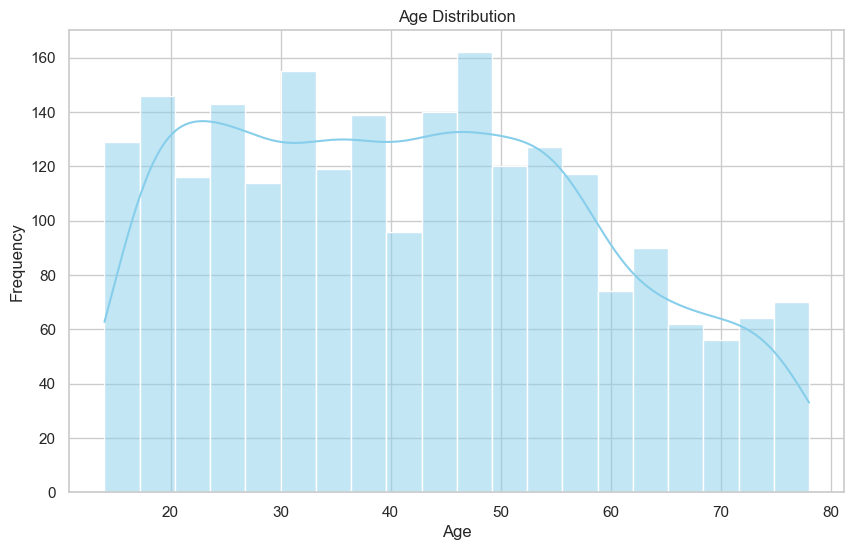

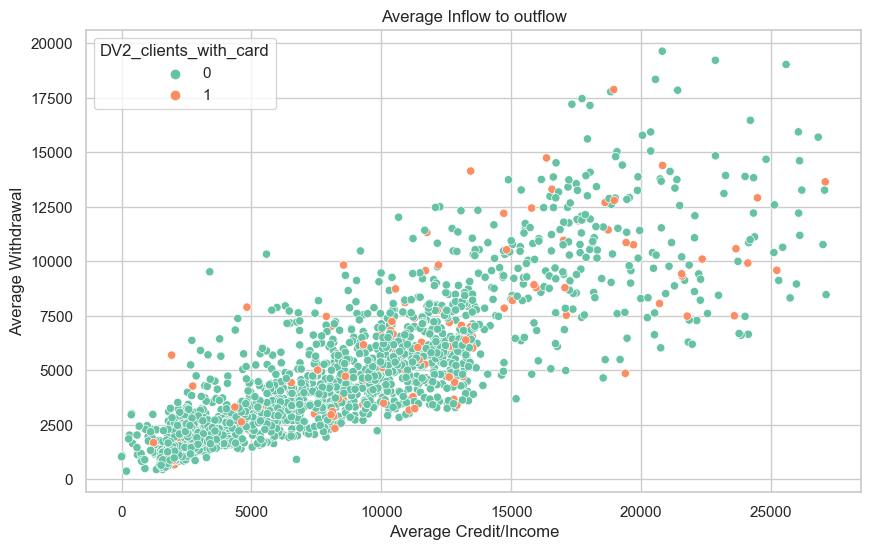

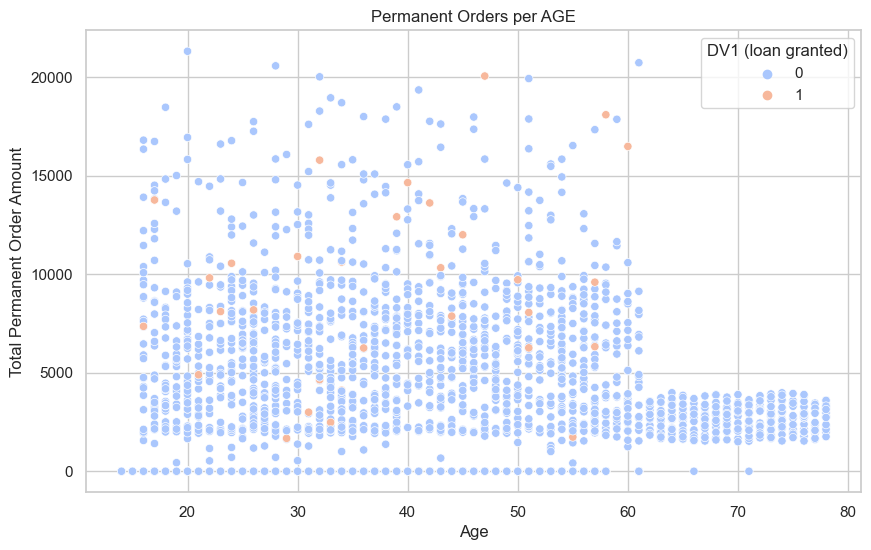

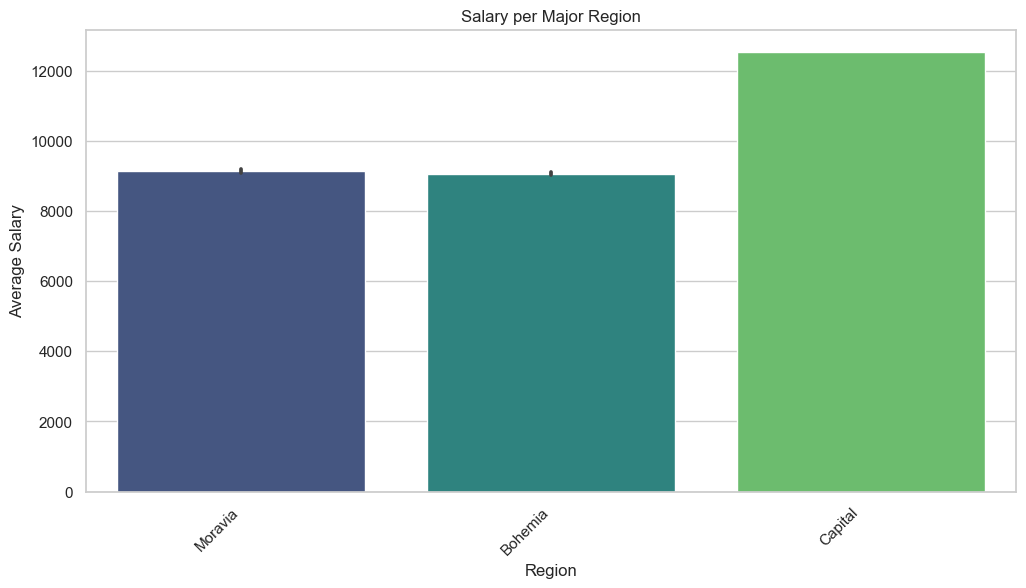

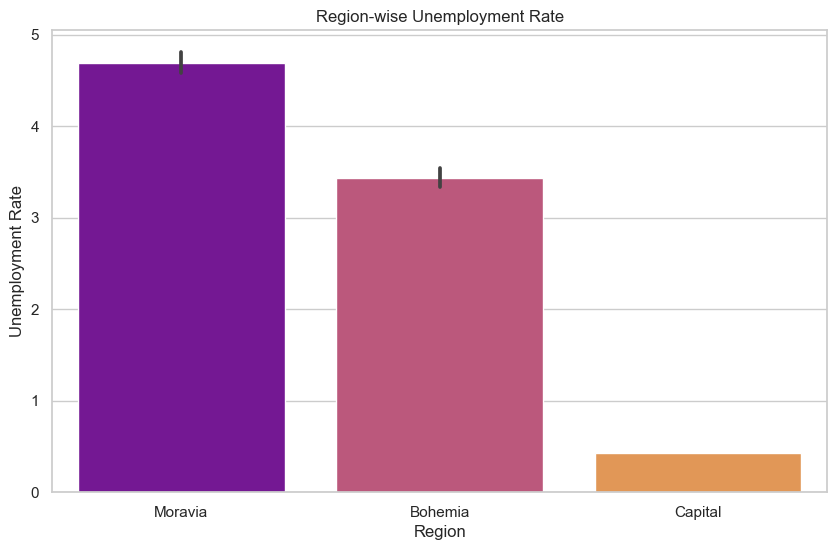

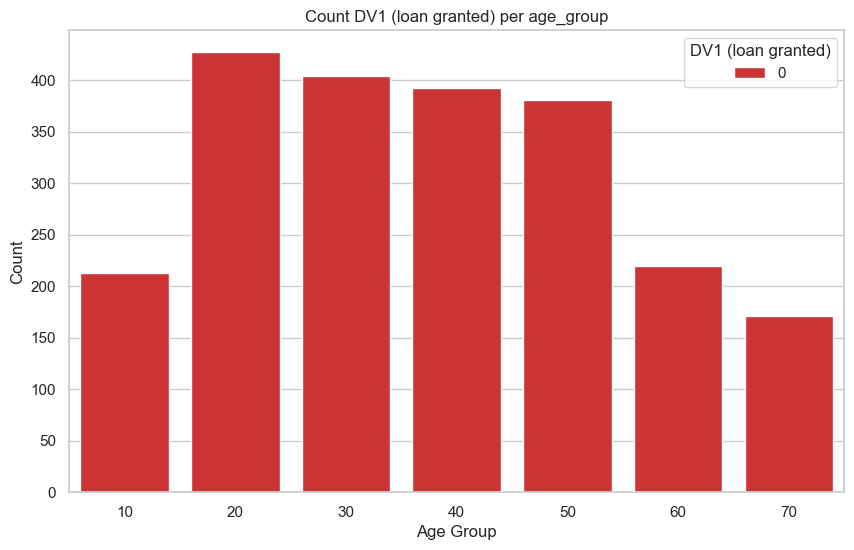

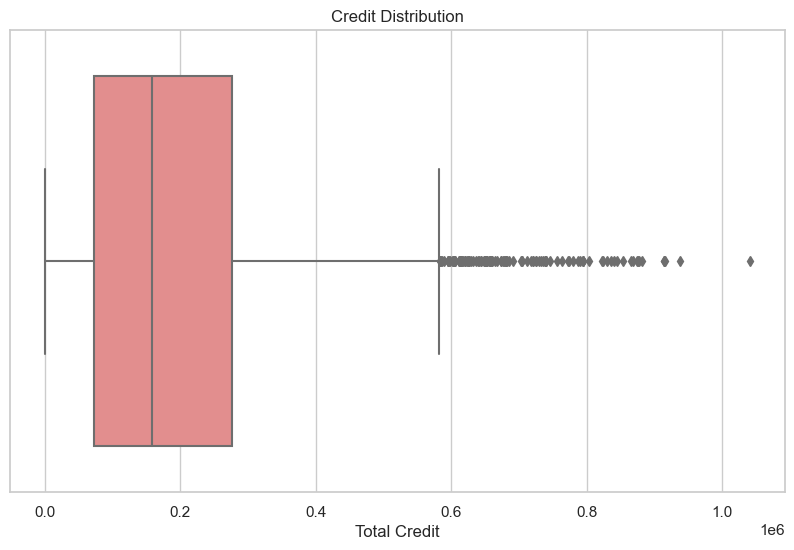

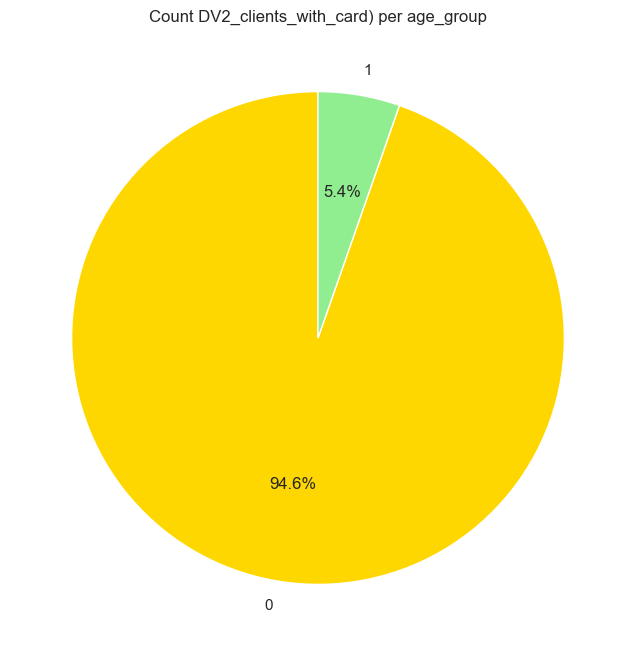

In [1081]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define the base path for saving plots
save_path = r'C:\K10\IESEG\Studies\Financial Programming Pyhton\Group Project\FP_GroupProject_GroupXX\FP_GroupProject_GroupXX\data\processed'




# Set the style for seaborn plots
sns.set(style="whitegrid")

# 1. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

#FREQ OF WHAT

# Save Plot 1
plt.savefig(f'{save_path}/Age_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


# 2. Average Credit vs. Average Withdrawal
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_credit', y='avg_withdrawal', data=df, hue='DV2_clients_with_card', palette='Set2')
plt.title('Average Credit vs. Average Withdrawal')
plt.xlabel('Average Credit/Income')
plt.ylabel('Average Withdrawal')
plt.title('Average Inflow to outflow')
plt.savefig(f'{save_path}/Average Inflow to outflow.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# 3. Total Permanent Orders vs. Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='total_permanent_order_amount', data=df, hue='DV1 (loan granted)', palette='coolwarm')
plt.title('Total Permanent Orders vs. Age')
plt.xlabel('Age')
plt.ylabel('Total Permanent Order Amount')
plt.title('Permanent Orders per AGE')
plt.savefig(f'{save_path}/Permanent Orders per AGE.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# 4. major_region  Average_Salary
plt.figure(figsize=(12, 6))
sns.barplot(x='major_region', y='average_salary', data=df, palette='viridis') # We can choose any color palette
plt.title('Major_region Average Salary')
plt.xlabel('Region')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.title('Salary per Major Region')
plt.savefig(f'{save_path}/Salary per Major Region.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# 5. Region-wise Unemployment Rate
plt.figure(figsize=(10, 6))
sns.barplot(x='major_region', y='unemployment_rate', data=df, palette='plasma')  # We can choose any color palette
plt.title('Region-wise Unemployment Rate')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate')
plt.title('Region-wise Unemployment Rate')
plt.savefig(f'{save_path}/Region-wise Unemployment Rate.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# 6. Loan Granted vs. Age Group
# Filter DataFrame to exclude rows where DV1 (loan granted) is 1
df_no_loan = df[df['DV1 (loan granted)'] == 0]

# Create countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='DV1 (loan granted)', data=df_no_loan, palette='Set1')
plt.title('Loan Granted vs. Age Group (Excluding DV1 = 1)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count DV1 (loan granted) per age_group')
plt.savefig(f'{save_path}/Count DV1.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# 8. Credit Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_credit', data=df, color='lightcoral')
plt.title('Credit Distribution')
plt.xlabel('Total Credit')
plt.title('Credit Distribution')
plt.savefig(f'{save_path}/Total Credit_Dist.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# 10. Count of Clients with Cards
plt.figure(figsize=(8, 8))
df['DV2_clients_with_card'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['gold', 'lightgreen'])
plt.title('Count of Clients with Cards')
plt.ylabel('')
plt.title('Count DV2_clients_with_card) per age_group')
plt.savefig(f'{save_path}/Count DV2.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()



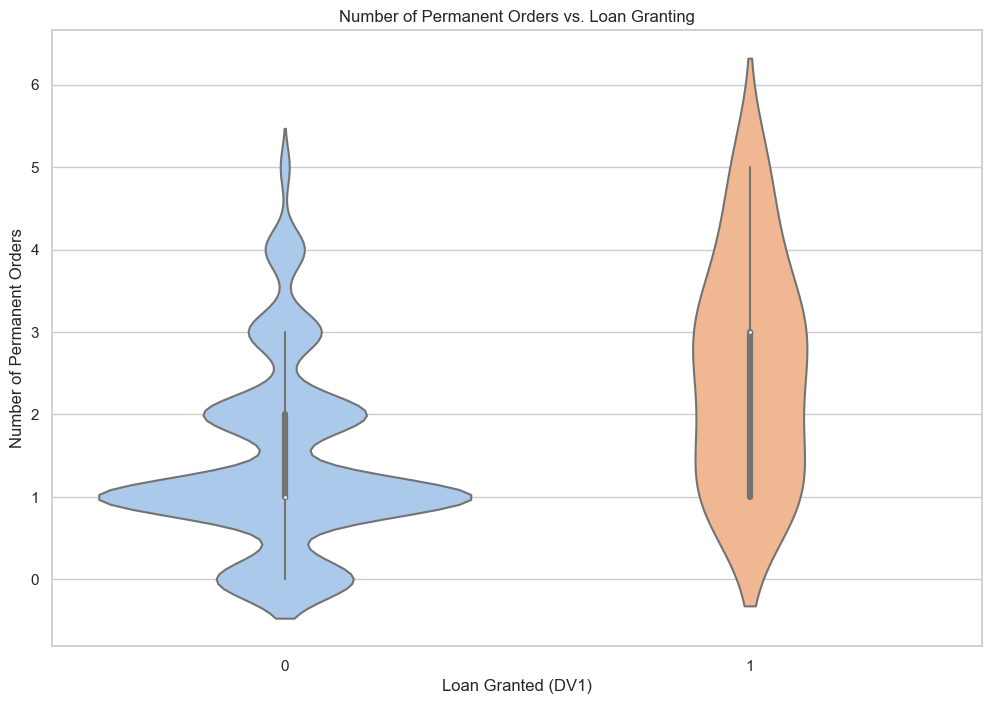

C:\Users\Source\anaconda3\envs\py\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

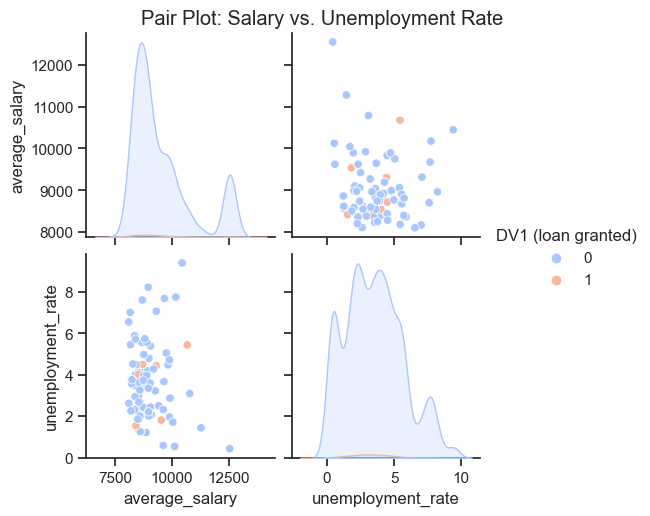

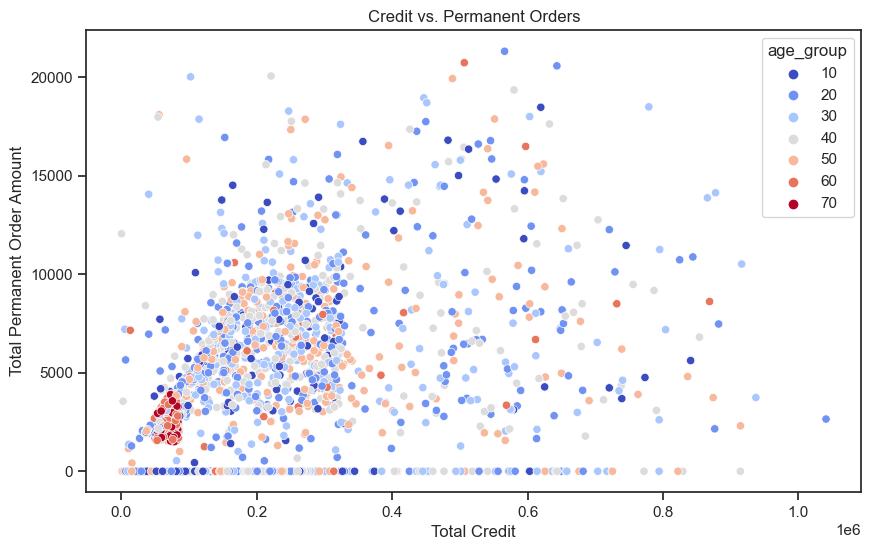

In [1082]:
#Part 2


# 11. Loan Granded to Permanent ORder
# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='DV1 (loan granted)', y='number_of_permanent_orders', data=df, palette='pastel')
plt.title('Number of Permanent Orders vs. Loan Granting')
plt.xlabel('Loan Granted (DV1)')
plt.ylabel('Number of Permanent Orders')
plt.savefig(f'{save_path}/Num_Permanent_Orders_vs_Loan_Granting.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# 12. Pair Plot: Salary vs. Unemployment Rate
# Set the style
sns.set(style="ticks")

# Create a pair plot
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='DV1 (loan granted)', palette='coolwarm', vars=['average_salary', 'unemployment_rate'])
plt.suptitle('Pair Plot: Salary vs. Unemployment Rate', y=1.02)
plt.savefig(f'{save_path}/Pair_Plot_Salary_vs_Unemployment_Rate.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# 13. Credit vs. Permanent Orders
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_credit', y='total_permanent_order_amount', data=df, hue='age_group', palette='coolwarm')
plt.title('Credit vs. Permanent Orders')
plt.xlabel('Total Credit')
plt.ylabel('Total Permanent Order Amount')
plt.savefig(f'{save_path}/Credit_vs_Permanent_Orders.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


C:\Users\Source\anaconda3\envs\py\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


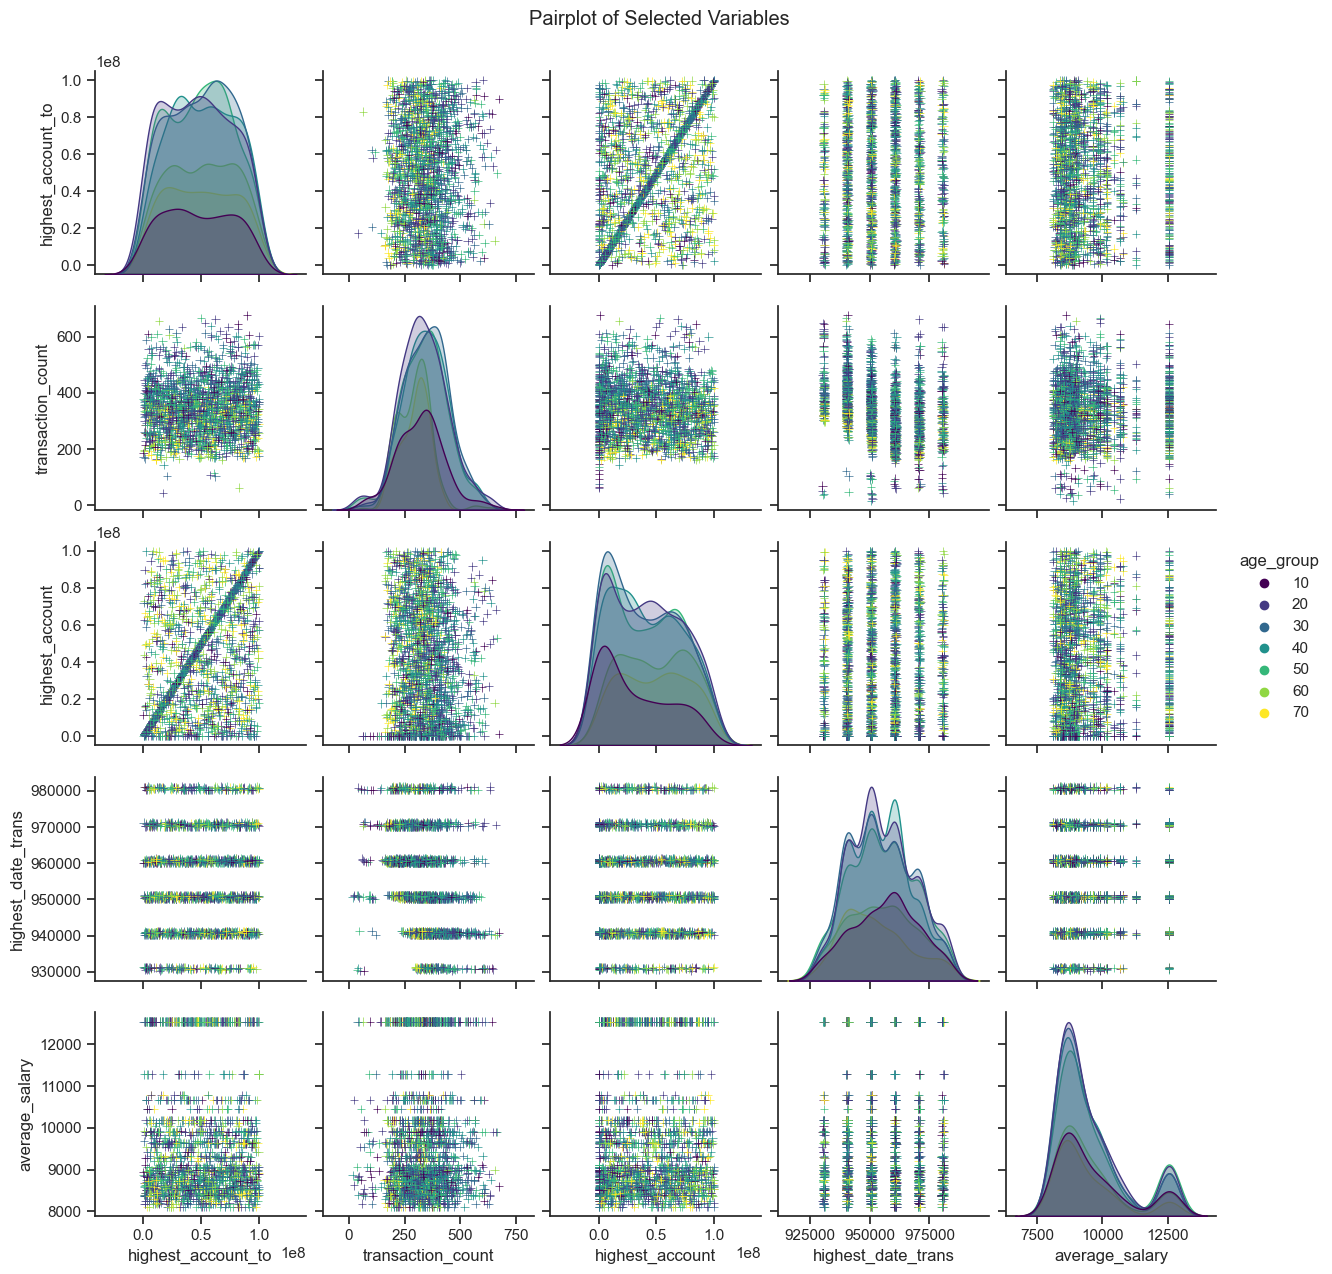

In [1091]:
# Selecting variables for the analysis
selected_variables = ['highest_account_to', 'transaction_count', 'highest_account', 'highest_date_trans', 'average_salary', 'age_group']

# Creating a DataFrame with selected variables
selected_df = df[selected_variables]

# Pairplot for visualizing relationships
sns.pairplot(selected_df, diag_kind='kde', markers='+', hue='age_group', palette='viridis')

# Adding title
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.savefig(f'{save_path}/Pair of Highest Amounts.png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()
plt.close()



In [1092]:
#TO Export to csv
df.to_csv('C:\K10\IESEG\Studies\Financial Programming Pyhton\Group Project\FP_GroupProject_GroupXX\FP_GroupProject_GroupXX\data\processed/GroupKetanAlveroLEO_Python.csv', index=False)